In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score, classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import tensorflow as tf
import keras
from keras import layers

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def metrics(y_true,y_pred):
    acc=accuracy_score(y_true, y_pred)
    f1=f1_score(y_true, y_pred)
    roc_auc=roc_auc_score(y_true, y_pred)
    print(f'accuracy: {acc}\nf1: {f1}\nroc auc: {roc_auc} ')

In [5]:
data = pd.read_csv('cumulative.csv')
data

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [6]:
data['rowid']

0          1
1          2
2          3
3          4
4          5
        ... 
9559    9560
9560    9561
9561    9562
9562    9563
9563    9564
Name: rowid, Length: 9564, dtype: int64

In [7]:
data.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


Визуализация целевой переменной

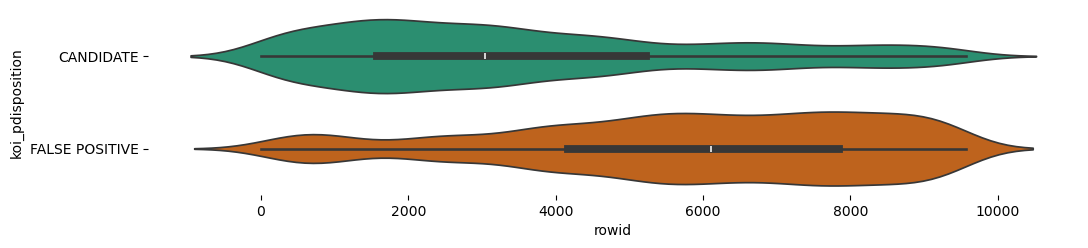

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['koi_pdisposition'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='rowid', y='koi_pdisposition', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

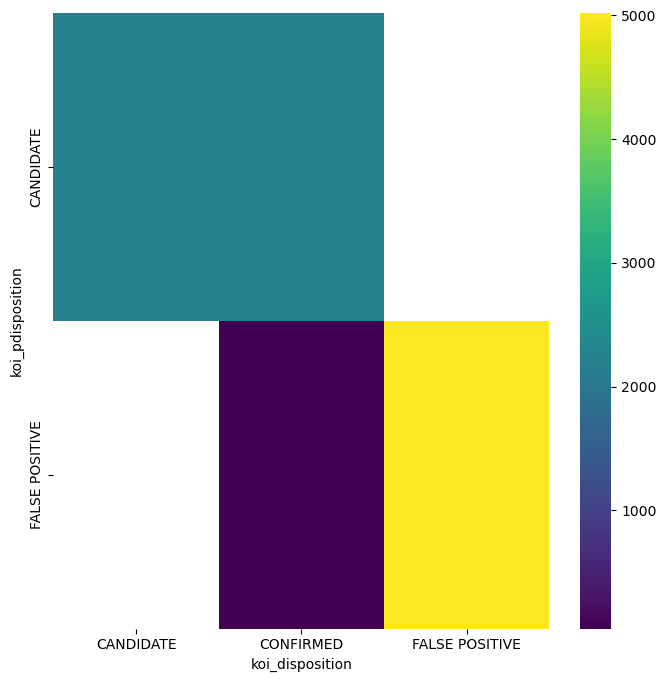

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['koi_pdisposition'].value_counts()
    for x_label, grp in data.groupby('koi_disposition')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('koi_disposition')
_ = plt.ylabel('koi_pdisposition')

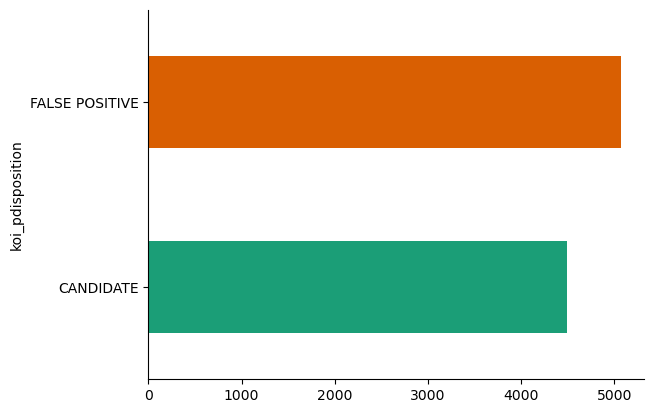

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('koi_pdisposition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Работа с пропусками и кодирование переменных

In [11]:
X=data.drop(['koi_teq_err1','koi_teq_err2', 'koi_disposition', 'koi_pdisposition','kepler_name', 'kepoi_name', 'rowid','koi_score', 'kepid'], axis=1)
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [12]:
Y=data['koi_pdisposition']
y=pd.get_dummies (Y, drop_first= True, dtype=float )
y = y.rename(columns={'FALSE POSITIVE': 'koi_pdisposition'})
y.head()


,koi_pdisposition
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_pdisposition  9564 non-null   float64
dtypes: float64(1)
memory usage: 74.8 KB


In [14]:
X=pd.get_dummies (X, drop_first= True, dtype=float )
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0.0,1.0
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0.0,1.0
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0.0,1.0
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0,1.0
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0.0,1.0


In [15]:
(X.isna().sum() / len(X)).round(4) * 100

koi_fpflag_nt                        0.00
koi_fpflag_ss                        0.00
koi_fpflag_co                        0.00
koi_fpflag_ec                        0.00
koi_period                           0.00
koi_period_err1                      4.75
koi_period_err2                      4.75
koi_time0bk                          0.00
koi_time0bk_err1                     4.75
koi_time0bk_err2                     4.75
koi_impact                           3.80
koi_impact_err1                      4.75
koi_impact_err2                      4.75
koi_duration                         0.00
koi_duration_err1                    4.75
koi_duration_err2                    4.75
koi_depth                            3.80
koi_depth_err1                       4.75
koi_depth_err2                       4.75
koi_prad                             3.80
koi_prad_err1                        3.80
koi_prad_err2                        3.80
koi_teq                              3.80
koi_insol                         

<Axes: >

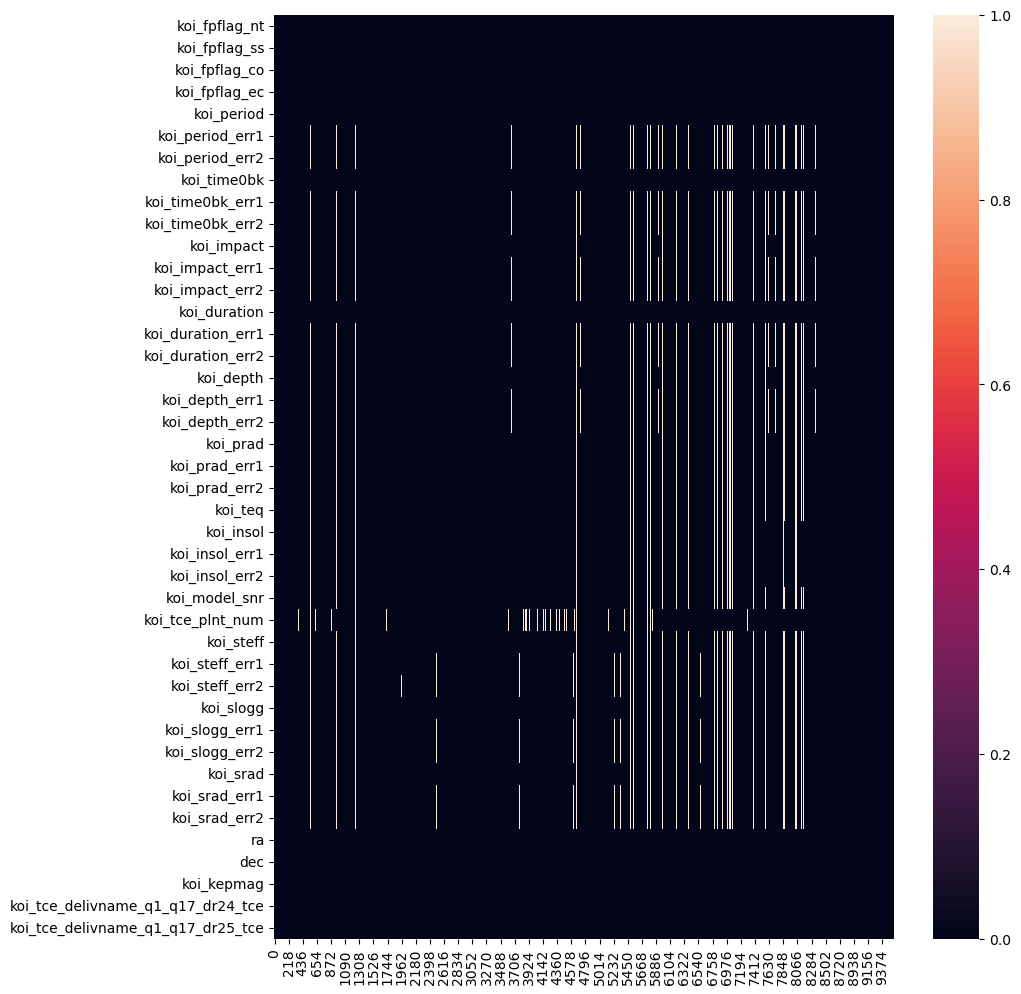

In [16]:
plt.figure(figsize=(10,12))
sns.heatmap(X.isna().transpose())
# plt.savefig('misses_heatmap.png', dpi=1000)

Удалим (при наличии колонки с пропусками более 50%)

In [17]:
X.shape[0] //2

4782

In [18]:
X=X.dropna(thresh=X.shape[0] //2, axis=1)
X.shape

(9564, 42)

In [19]:
np.arange(1,len(X)+1)

array([   1,    2,    3, ..., 9562, 9563, 9564])

In [20]:
X=X.interpolate(method='nearest')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   koi_fpflag_nt                      9564 non-null   int64  
 1   koi_fpflag_ss                      9564 non-null   int64  
 2   koi_fpflag_co                      9564 non-null   int64  
 3   koi_fpflag_ec                      9564 non-null   int64  
 4   koi_period                         9564 non-null   float64
 5   koi_period_err1                    9564 non-null   float64
 6   koi_period_err2                    9564 non-null   float64
 7   koi_time0bk                        9564 non-null   float64
 8   koi_time0bk_err1                   9564 non-null   float64
 9   koi_time0bk_err2                   9564 non-null   float64
 10  koi_impact                         9564 non-null   float64
 11  koi_impact_err1                    9564 non-null   float

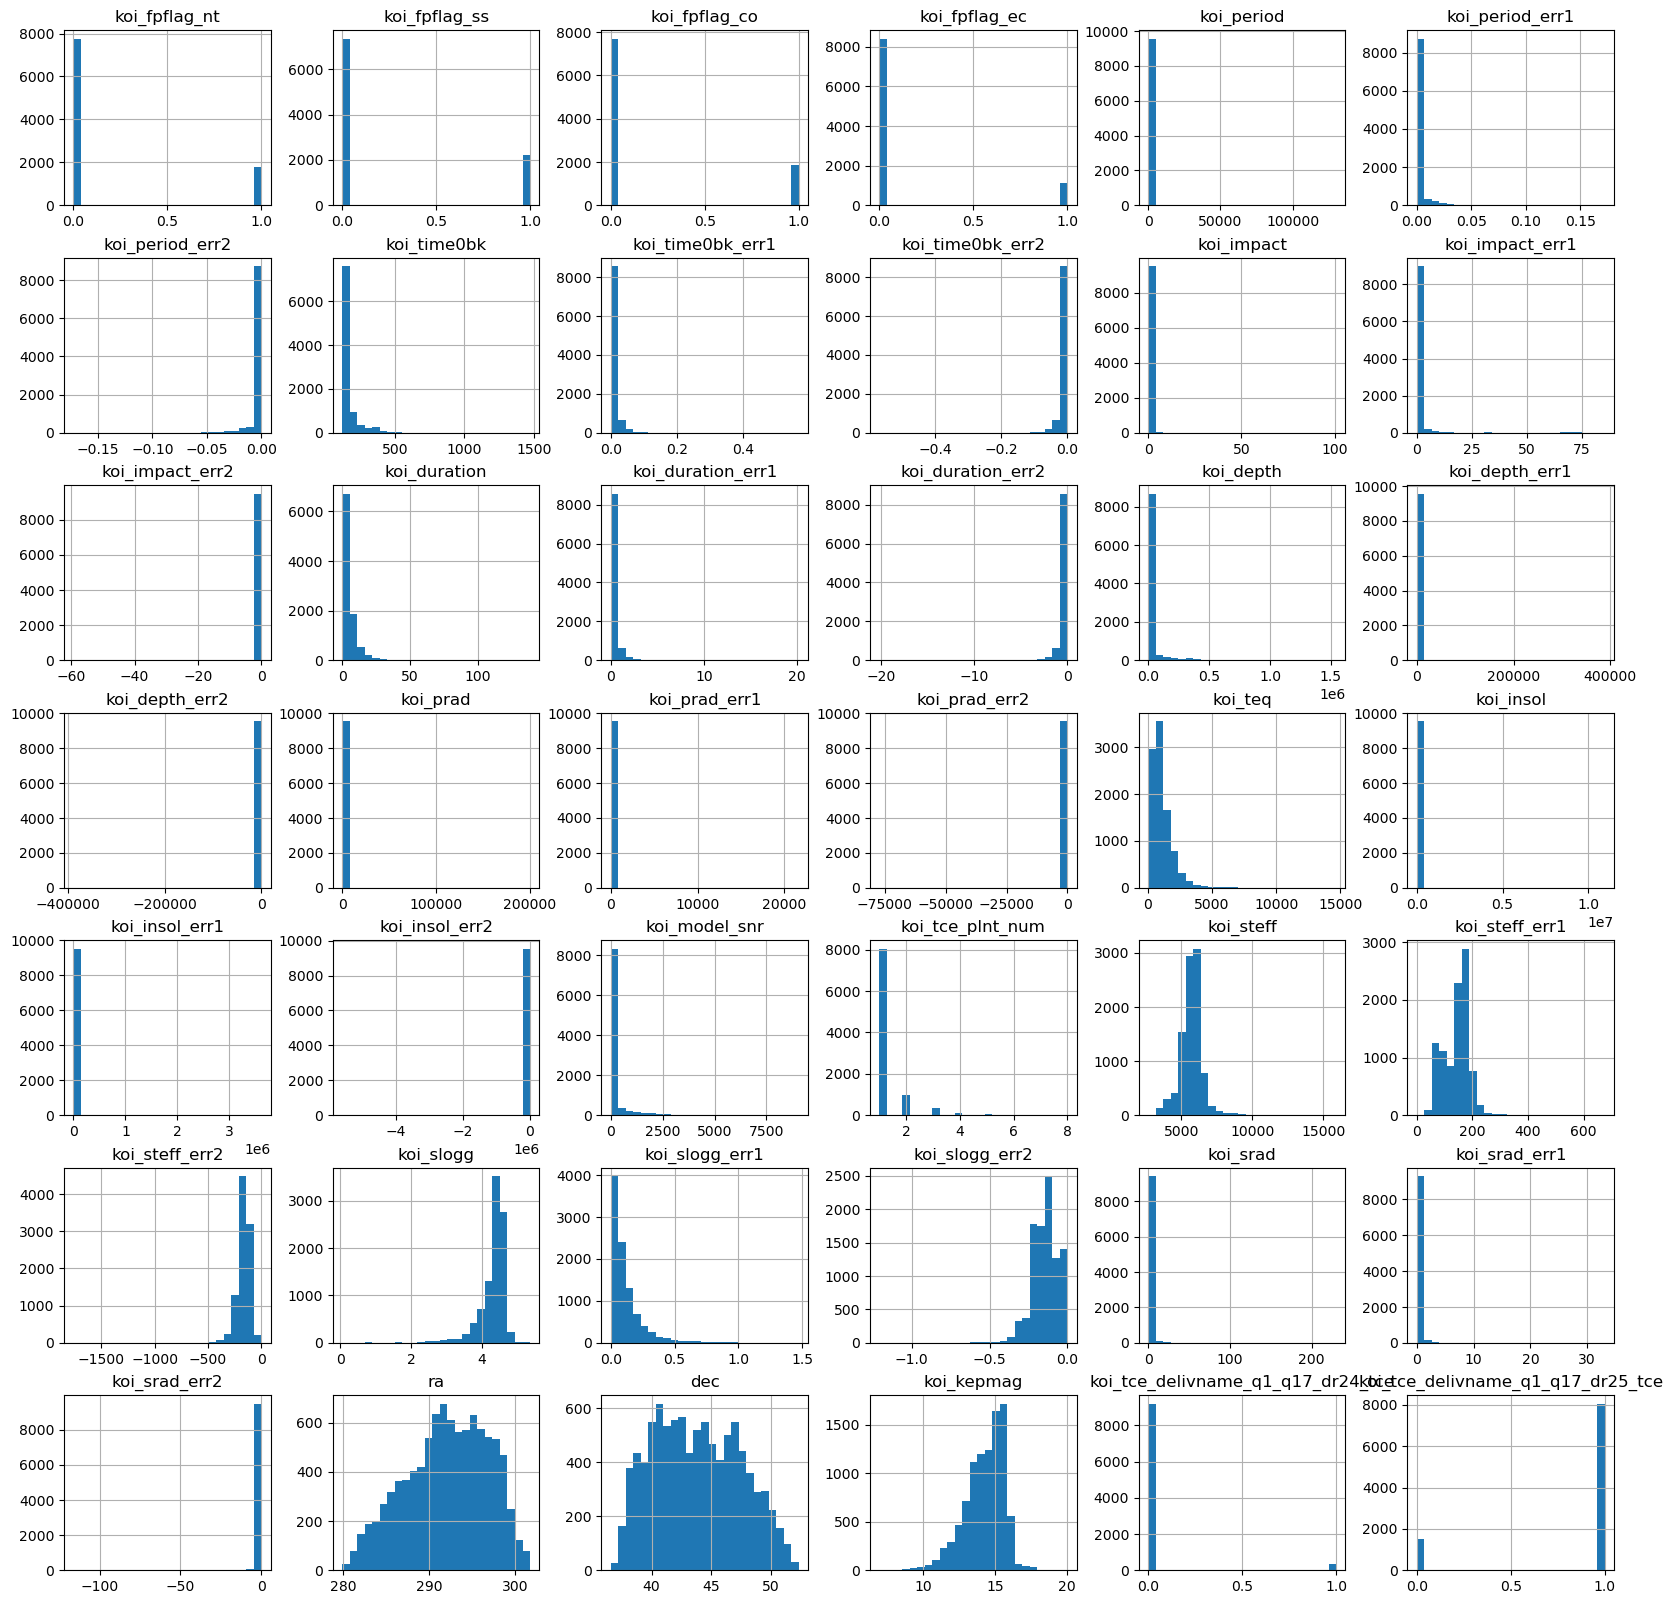

In [21]:
X.hist(bins=25, figsize=(20,20));

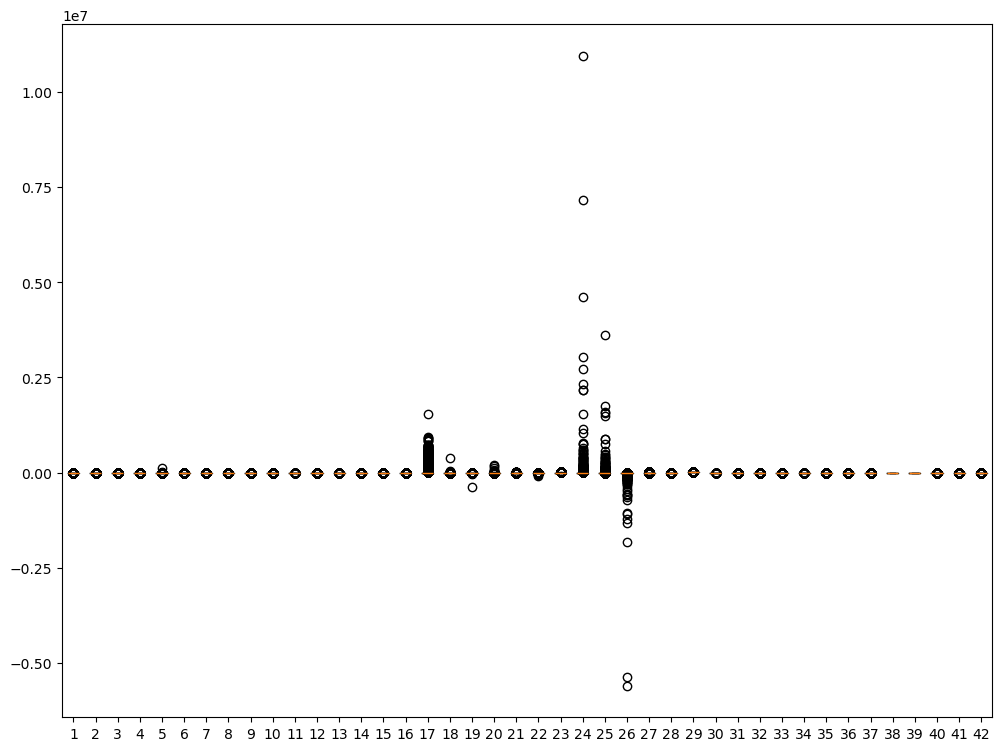

In [22]:
fig, ax = plt.subplots(figsize=(12,9))
ax.boxplot(X, vert=True);

В данных есть выбросы, пока что их оставим

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
rfc = RandomForestClassifier(max_depth=2, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred_train=rfc.predict(X_train)
rfc_pred_test=rfc.predict(X_test)
rfc.score(X_train, y_train)

0.9222323879231473

In [25]:
metrics(y_test,rfc_pred_test)

accuracy: 0.9158389963408259
f1: 0.9182326053834434
roc auc: 0.9178450601875332 


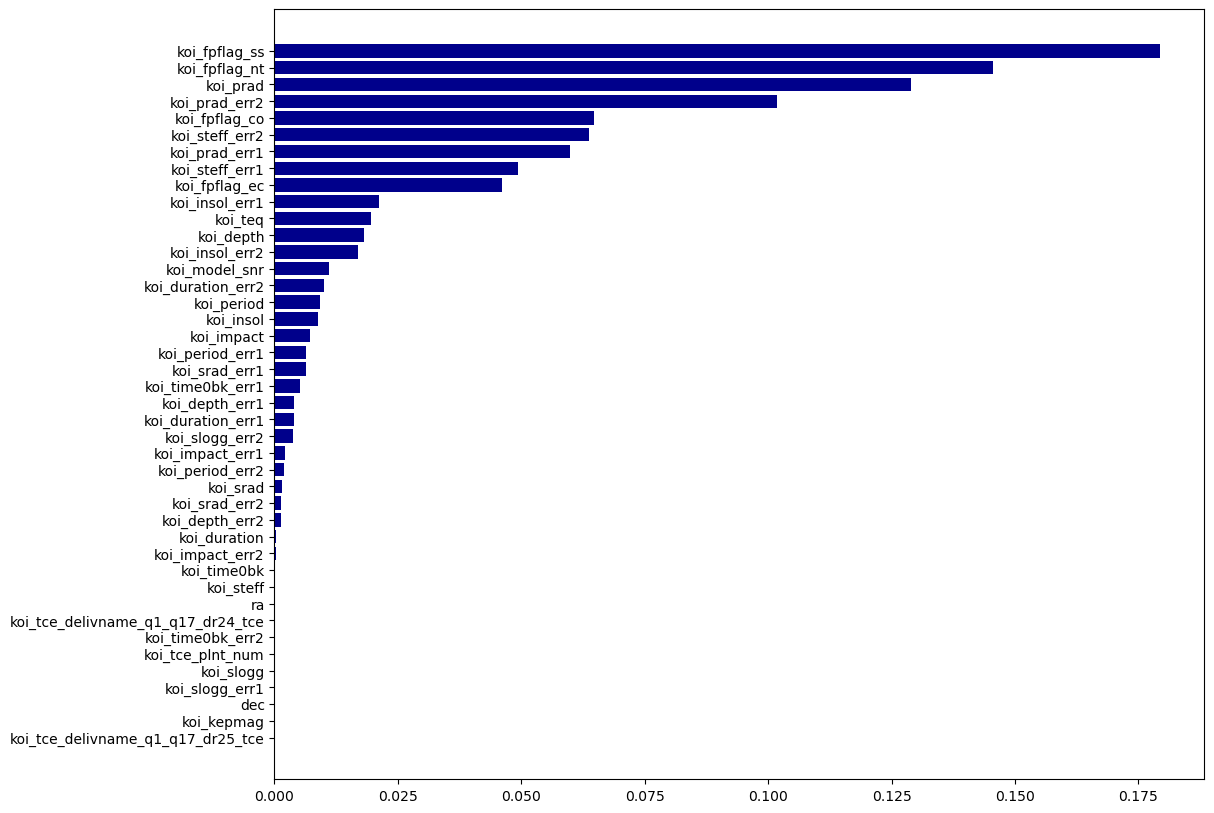

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_depth', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff_err1',
       'koi_steff_err2'],
      dtype='object')


In [26]:
feature_importances = rfc.feature_importances_
sorted_indices = np.argsort(feature_importances)
plt.figure(figsize=(12, 10))
plt.barh(np.arange(len(feature_importances)), feature_importances[sorted_indices], color='darkblue')
plt.yticks(np.arange(len(X.columns)), X.columns[sorted_indices])
plt.show()
selected_features = X.columns[feature_importances > 0.01]
print(selected_features)

In [27]:
rfi = RandomForestClassifier(max_depth=2, random_state=42)
rfi.fit(X_train[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_depth', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff_err1',
       'koi_steff_err2']], y_train)
rfi_pred_train=rfi.predict(X_train[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_depth', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff_err1',
       'koi_steff_err2']])
rfi_pred_test=rfi.predict(X_test[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_depth', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff_err1',
       'koi_steff_err2']])
rfi.score(X_train[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_depth', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_steff_err1',
       'koi_steff_err2']], y_train)

0.9486341654685662

In [28]:
metrics(y_test,rfi_pred_test)

accuracy: 0.9456351280710925
f1: 0.94831013916501
roc auc: 0.9462939057241274 


In [29]:
num=np.arange(1,1914,1)
num

array([   1,    2,    3, ..., 1911, 1912, 1913])

Text(0.5, 1.0, 'Random Forest Model')

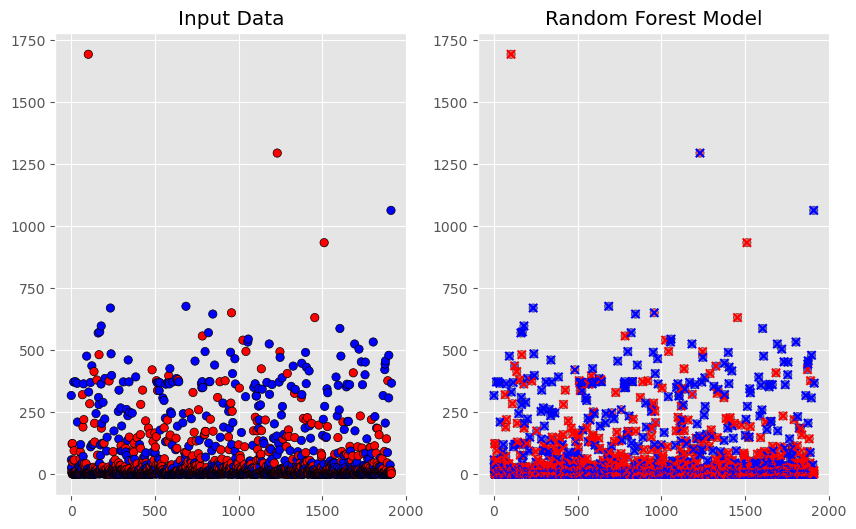

In [30]:
x_min, x_max = X_test['koi_period'].min() - 0.5, X_test['koi_period'].max() + 0.5
y_min, y_max = num.min() - 0.5, num.max() + 0.5
cmap = LinearSegmentedColormap.from_list("mycmap", ['#FF0000', '#0000FF'], N=2)
figure = plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
#начальные данные
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(num,X_test['koi_period'], c=y_test['koi_pdisposition'], cmap=cmap, edgecolors="k")
ax1.set_title("Input Data")
# Визуализируем результат модели
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(num,X_test['koi_period'], c=y_test['koi_pdisposition'], cmap=cmap, alpha=0.6, edgecolors="k")
ax2.scatter(num,X_test['koi_period'], c=rfc_pred_test, cmap=cmap, marker='x', edgecolors="k")
ax2.set_title("Random Forest Model")

In [31]:
df=pd.concat([X, y])
df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce,koi_pdisposition
0,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0.0,1.0,NaN
1,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0.0,1.0,NaN
2,0.0,1.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0.0,1.0,NaN
3,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0,1.0,NaN
4,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0.0,1.0,NaN


VarianceThreshold

In [32]:
from sklearn.feature_selection import VarianceThreshold

In [33]:
Y_var=y

In [34]:
Y_var

,koi_pdisposition
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
9559,1.0
9560,1.0
9561,0.0
9562,1.0


In [35]:
X_var=X
selector = VarianceThreshold(0.25)
X_var=selector.fit_transform(X_var)

In [36]:
X_var.shape

(9564, 29)

In [37]:
X_var_train, X_var_test, y_var_train, y_var_test = train_test_split(X_var, Y_var, test_size=0.2, random_state=42)

In [38]:
model_var=RandomForestClassifier(max_depth=2, random_state=42)
model_var.fit(X_var_train,y_var_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [39]:
var_pred=model_var.predict(X_var_test)

In [40]:
X_var.shape

(9564, 29)

In [41]:
metrics(y_var_test, var_pred)

accuracy: 0.7673810768426556
f1: 0.7556287753981329
roc auc: 0.773827479236783 


Автоотбор признаков

In [42]:
from sklearn.feature_selection import f_classif,SelectKBest

In [43]:
f_statistic, p_values = f_classif(X, y)

In [44]:
selector = SelectKBest(f_classif, k=8)
X_f = selector.fit_transform(X,y)
mask = selector.get_support(indices=True)
best_features = [X.columns[i] for i in mask]
print(best_features)

['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_depth', 'koi_teq', 'koi_steff_err1', 'koi_steff_err2']


In [45]:
y_f=y
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.2, random_state=42)

In [46]:
model_f=RandomForestClassifier(max_depth=2, random_state=42)
model_f.fit(X_f_train, y_f_train)
f_pred=model_f.predict(X_f_test)

In [47]:
metrics(y_f_test, f_pred)

accuracy: 0.9790904338734971
f1: 0.9801192842942346
roc auc: 0.9798926657489797 


пока что это самое лучшее что происходило с этими данными

Мой любимый XGBOOST

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Прогоним через gridsearchcv

In [149]:
xgbmodel = XGBClassifier()
parameters = {'learning_rate': [0.03, 0.1],
              'max_depth': [2,3.5, 10],
              'colsample_bytree': [0.7, 0.5, 1],
              'n_estimators': [0,150,10]}

xgb_grid = GridSearchCV(xgbmodel,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
0.9807611877875366
{'colsample_bytree': 1, 'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 150}


In [150]:
xgb=XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=2, colsample_bytree=0.7 ,randomstate=0)
xgb.fit(X_f_train, y_f_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [151]:
xgb_pred=xgb.predict(X_f_train)

In [152]:
metrics(y_test, xgb.predict(X_f_test))

accuracy: 0.9822268687924726
f1: 0.9831516352824579
roc auc: 0.982836728555653 


In [153]:
metrics(y_f_train, xgb_pred)

accuracy: 0.985099986929813
f1: 0.9858455425875341
roc auc: 0.985386092822667 


Catboost

In [54]:
from catboost import CatBoostClassifier

In [156]:
cat=CatBoostClassifier(n_estimators=150, learning_rate=0.1, max_depth=2,bootstrap_type='Bayesian', task_type='GPU')
cat.fit(X_f_train,y_f_train, verbose=False)

In [155]:
cat_pred=cat.predict(X_f_test)
metrics(y_test, cat_pred)

accuracy: 0.9822268687924726
f1: 0.9831516352824579
roc auc: 0.982836728555653 


Создадим НС

In [57]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
8117,0,1,0,0,0.651732,1.400000e-07,-1.400000e-07,131.751463,0.000179,-0.000179,...,0.458,-0.183,1.472,0.408,-0.560,289.09744,46.811081,13.879,0.0,1.0
5245,0,1,0,0,0.948952,6.240000e-07,-6.240000e-07,132.468516,0.000762,-0.000762,...,0.105,-0.195,1.000,0.455,-0.245,293.24536,38.272182,18.241,0.0,1.0
5865,0,0,0,0,4.644901,3.836000e-05,-3.836000e-05,133.674360,0.007860,-0.007860,...,0.052,-0.017,0.770,0.027,-0.046,282.34305,48.340778,14.480,0.0,1.0
4050,0,0,0,0,309.255810,1.495000e-02,-1.495000e-02,136.224800,0.022400,-0.022400,...,0.063,-0.305,1.057,0.502,-0.110,291.70050,37.843731,14.205,0.0,0.0
5130,1,0,0,0,0.916327,3.810000e-07,-3.810000e-07,131.809050,0.000373,-0.000373,...,0.052,-0.208,0.972,0.300,-0.100,290.09695,41.970680,15.896,0.0,1.0


In [58]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)

In [59]:
X_train-= mean
X_train/= std
X_test-= mean
X_test/= std

In [159]:
X_test.mean(axis=0)[:10]

koi_fpflag_nt      -0.031664
koi_fpflag_ss       0.018559
koi_fpflag_co       0.023443
koi_fpflag_ec       0.033180
koi_period         -0.014784
koi_period_err1    -0.049006
koi_period_err2     0.049006
koi_time0bk        -0.022349
koi_time0bk_err1    0.008855
koi_time0bk_err2   -0.008855
dtype: float64

In [169]:
print('train mean:', X_train.mean(axis=0)[:5]) 

train mean: koi_fpflag_nt   -2.786078e-17
koi_fpflag_ss    8.822580e-18
koi_fpflag_co    3.807640e-17
koi_fpflag_ec   -9.286926e-19
koi_period      -3.714771e-18
dtype: float64


In [160]:
X_train.std(axis=0)[:5]

koi_fpflag_nt    1.0
koi_fpflag_ss    1.0
koi_fpflag_co    1.0
koi_fpflag_ec    1.0
koi_period       1.0
dtype: float64

In [62]:
import tensorflow as tf 
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu' ),
                    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1376      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


Epoch 1/16
240/240 [==============================] - 2s 3ms/step - loss: 0.2830
Epoch 2/16
240/240 [==============================] - 1s 3ms/step - loss: 0.0698
Epoch 3/16
240/240 [==============================] - 1s 3ms/step - loss: 0.0498
Epoch 4/16
240/240 [==============================] - 1s 4ms/step - loss: 0.0422
Epoch 5/16
240/240 [==============================] - 1s 4ms/step - loss: 0.0387
Epoch 6/16
240/240 [==============================] - 1s 4ms/step - loss: 0.0362
Epoch 7/16
240/240 [==============================] - 1s 4ms/step - loss: 0.0340
Epoch 8/16
240/240 [==============================] - 1s 4ms/step - loss: 0.0320
Epoch 9/16
240/240 [==============================] - 1s 4ms/step - loss: 0.0315
Epoch 10/16
240/240 [==============================] - 1s 4ms/step - loss: 0.0293
Epoch 11/16
240/240 [==============================] - 1s 4ms/step - loss: 0.0278
Epoch 12/16
240/240 [==============================] - 1s 4ms/step - loss: 0.0268
Epoch 13/16
240/240 [====

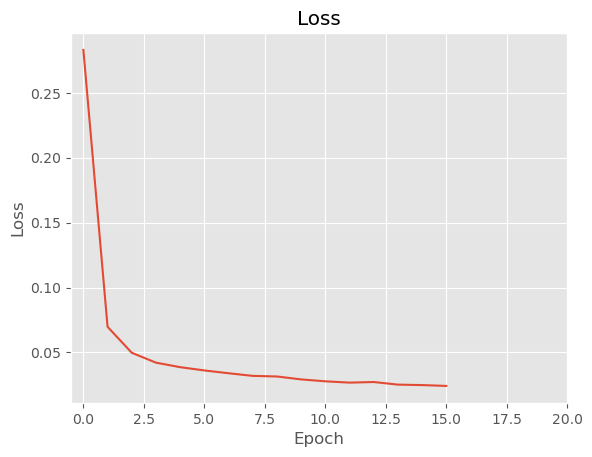

In [64]:
# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение модели
history = model.fit(X_train, y_train, epochs=16, verbose=1)

# Визуализация процесса обучения
plt.plot(history.history['loss'])
plt.xlim(-0.5,20)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

ДАТАГЕНЕРАТОР

In [65]:
import numpy as np
from tensorflow.keras.utils import Sequence


class DataGenerator(Sequence):
    def __init__(self, data, labels, batch_size=1):
        self.batch_size = batch_size
        self.data = data
        self.labels = labels
        
    def __len__(self):
        return int(np.round(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        X = self.data[index * self.batch_size : (index+1) * self.batch_size]
        y = self.labels[index * self.batch_size : (index+1) * self.batch_size]

        return X, y

In [66]:
train_datagen = DataGenerator(X_train, y_train)
test_datagen = DataGenerator(X_test, y_test)

In [67]:
print(len(train_datagen))
print(len(test_datagen))

7651
1913


In [68]:
# history=model.fit(train_datagen, epochs=64,batch_size=100, validation_data=(test_datagen), validation_freq=4 )

In [69]:
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='validation loss')
# plt.legend( );

In [70]:
    from tensorflow.keras.callbacks import ModelCheckpoint

    # Создаем коллбэк для выполнения оценки на валидационных данных
    checkpoint = ModelCheckpoint(filepath='best_model.h5', save_best_only=True, save_weights_only=True)

In [71]:
# Обучение модели с выполнением оценки на валидационных данных
history = model.fit(train_datagen, epochs=16, batch_size=100, validation_data=test_datagen, callbacks=[checkpoint])

# Загрузка лучших весов модели
model.load_weights('best_model.h5')

Epoch 1/16


7651/7651 [==============================] - 38s 5ms/step - loss: 0.0574 - val_loss: 0.0493
Epoch 2/16
7651/7651 [==============================] - 37s 5ms/step - loss: 0.0396 - val_loss: 0.0542
Epoch 3/16
7651/7651 [==============================] - 37s 5ms/step - loss: 0.0365 - val_loss: 0.0474
Epoch 4/16
7651/7651 [==============================] - 37s 5ms/step - loss: 0.0327 - val_loss: 0.0505
Epoch 5/16
7651/7651 [==============================] - 37s 5ms/step - loss: 0.0332 - val_loss: 0.0529
Epoch 6/16
7651/7651 [==============================] - 37s 5ms/step - loss: 0.0308 - val_loss: 0.0582
Epoch 7/16
7651/7651 [==============================] - 37s 5ms/step - loss: 0.0299 - val_loss: 0.0697
Epoch 8/16
7651/7651 [==============================] - 36s 5ms/step - loss: 0.0277 - val_loss: 0.1257
Epoch 9/16
7651/7651 [==============================] - 37s 5ms/step - loss: 0.0291 - val_loss: 0.0563
Epoch 10/16
7651/7651 [==============================] - 37s 5ms/step - loss: 0.0277

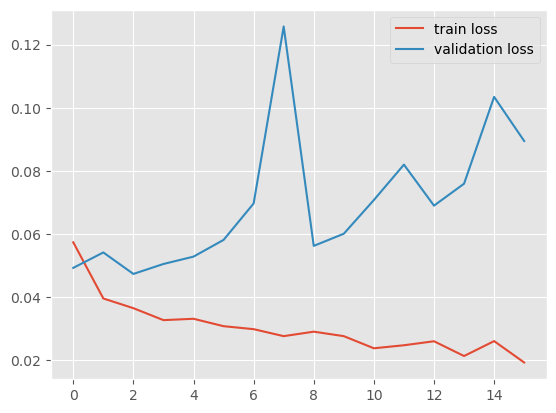

In [72]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend( );

Бонус

In [102]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=50, random_state=0)
clf.fit(X_f)

IsolationForest(max_samples=50, random_state=0)

In [103]:
pred=clf.predict(X_f_test)

In [140]:
pred

array([ 1,  1, -1, ...,  1,  1,  1])

In [142]:
pred_processed = np.where(pred == -1, 0, pred)

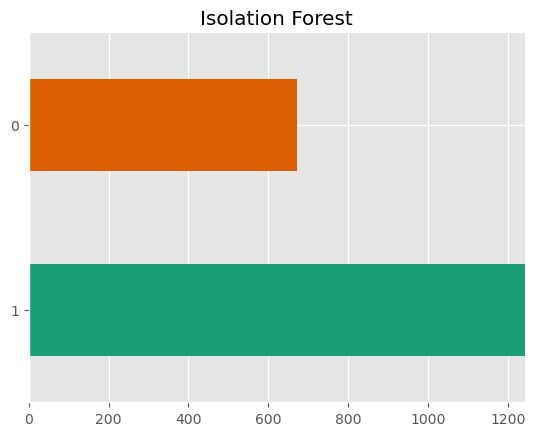

In [145]:
pred_counts = pd.Series(pred_processed).value_counts()

# Строим график
pred_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Isolation Forest')
plt.xlim(0, pred_counts.max()) # Устанавливаем максимальное значение по оси x равным максимальному количеству записей
plt.savefig('iso disb.jpg', dpi=500)
plt.show()

In [115]:
zeros_count = y_test[y_test == 0].count()
ones_count = y_test[y_test == 1].count()

print("Количество нулей в y_test:", zeros_count)
print("Количество единиц в y_test:", ones_count)

Количество нулей в y_test: koi_pdisposition    894
dtype: int64
Количество единиц в y_test: koi_pdisposition    1019
dtype: int64
